# Yeast +1 library

# Overview

In [1]:
# default modules
import sys
import math
import random
import pickle

In [2]:
# external modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as tck

In [3]:
# increase figure resolution
plt.rcParams['figure.dpi'] = 200

In [4]:
# custom modules
import analysis_final as analysis
from SliderClass_final import Slider
import graph_final as graph

In [5]:
# working directory
#path = "/home/spark159/../../media/spark159/sw/slide_seq_data(2021.07.14)/"
path = "./"

In [6]:
# basic parameters
tlen = 225 # sliding DNA template length
NCPlen = 147 # nucleosomal DNA length

In [7]:
# load +1 library data
SD_sliders = pickle.load(open(path+'Plusone_SD_corrected'+'.pickle'))
HS_sliders = pickle.load(open(path+'Plusone_HS_corrected'+'.pickle'))
Chd1_sliders = pickle.load(open(path+'Plusone_HS+Chd1_corrected'+'.pickle'))

In [8]:
# set target ids
common_ids = list(set(SD_sliders.keys()) & set(HS_sliders.keys()) & set(Chd1_sliders.keys()))
common_ids = sorted([int(id) for id in common_ids])
common_ids = [str(id) for id in common_ids]
random.seed(0)
target_ids = random.sample(common_ids, 40)

In [52]:
# sort ids
common_ids = sorted([int(id) for id in common_ids])
common_ids = [str(id) for id in common_ids]    
    

In [53]:
# write dyad signal
def write_dyad_sig (sliders,
                    ids,
                    note=''):
    out_fname = 'dyad_corrected_%s.txt' % (note)
    f = open(out_fname, 'w')
    for id in ids:
        print >> f, '>%s' % (id)
        dyad_sig = sliders[id].get_dyadmap()
        dyad_sig = [str(value) for value in dyad_sig]
        print >> f, ','.join(dyad_sig)
    f.close()

In [54]:
write_dyad_sig (SD_sliders, common_ids, note='SD')
write_dyad_sig (HS_sliders, common_ids, note='HS')
write_dyad_sig (Chd1_sliders, common_ids, note='HS+Chd1')


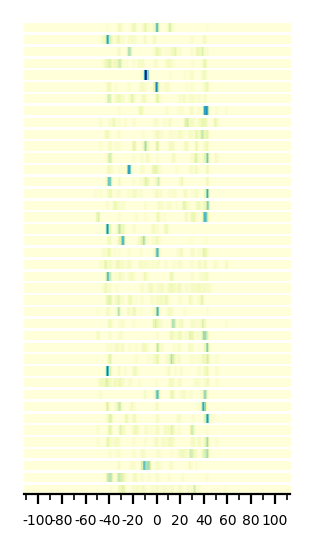

0.0

In [32]:
# dyad map (SD)
note = 'SD'
graph.plot_map(SD_sliders,
               Slider.KDE,
               ids=target_ids, 
               mark=None,
               cmap='YlGnBu',
               thickness=[8,2,2], 
               xticks=[[i+tlen/2 for i in range(-100, 101, 20)],
                       [str(i) for i in range(-100, 101, 20)]], 
               figscale=150,
               fontsize=5,
               save=False,
               note=note,
               scale=100,
               band_width=1)[0][0]

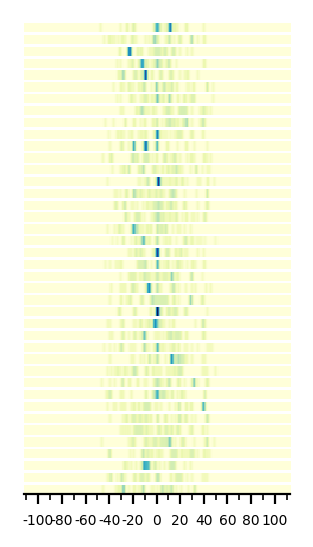

0.0

In [33]:
# dyad map (HS)
note = 'HS'
graph.plot_map(HS_sliders,
               Slider.KDE,
               ids=target_ids, 
               mark=None,
               cmap='YlGnBu',
               thickness=[8,2,2], 
               xticks=[[i+tlen/2 for i in range(-100, 101, 20)],
                       [str(i) for i in range(-100, 101, 20)]], 
               figscale=150,
               fontsize=5,
               save=False,
               note=note,
               scale=100,
               band_width=1)[0][0]

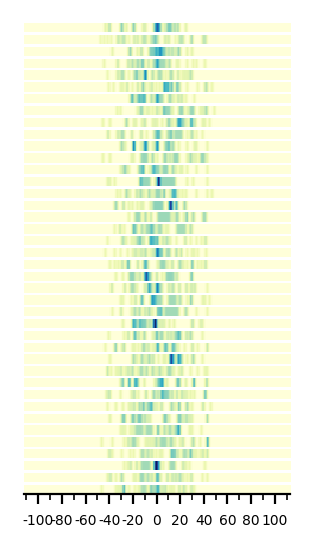

0.0

In [34]:
# dyad map (HS+Chd1)
note = 'HS+Chd1'
graph.plot_map(Chd1_sliders,
               Slider.KDE,
               ids=target_ids, 
               mark=None,
               cmap='YlGnBu',
               thickness=[8,2,2], 
               xticks=[[i+tlen/2 for i in range(-100, 101, 20)],
                       [str(i) for i in range(-100, 101, 20)]], 
               figscale=150,
               fontsize=5,
               save=False,
               note=note,
               scale=100,
               band_width=1)[0][0]

In [12]:
## plot cleavages and dyad signals (SD)
#graph.plot_sig(SD_sliders, [Slider.get_dyadmap, Slider.get_top_cutmap, Slider.get_bottom_cutmap], 
#               ids=target_ids, label=['Dyad', 'Top', 'Bottom'], color=['Blue', 'tab:green', 'tab:orange'], alpha=[1, 0.5, 0.5], 
#               xticks=[[i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)]])

In [13]:
## plot cleavages and dyad signals (HS)
#graph.plot_sig(HS_sliders, [Slider.get_dyadmap, Slider.get_top_cutmap, Slider.get_bottom_cutmap], 
#               ids=target_ids, label=['Dyad', 'Top', 'Bottom'], color=['Blue', 'tab:green', 'tab:orange'], alpha=[1, 0.5, 0.5], 
#               xticks=[[i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)]])

In [14]:
## plot cleavages and dyad signals (HS+Chd1)
#graph.plot_sig(Chd1_sliders, [Slider.get_dyadmap, Slider.get_top_cutmap, Slider.get_bottom_cutmap], 
#               ids=target_ids, label=['Dyad', 'Top', 'Bottom'], color=['Blue', 'tab:green', 'tab:orange'], alpha=[1, 0.5, 0.5], 
#               xticks=[[i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)]])

In [46]:
# save cleavages and dyad signals (SD)
graph.plot_sig(SD_sliders,
               #[Slider.get_dyadmap, Slider.get_top_cutmap, Slider.get_bottom_cutmap],
               [Slider.get_dyadmap],
               ids=common_ids,
               label=['Dyad', 'Top', 'Bottom'], 
               color=['Blue', 'tab:green', 'tab:orange'],
               alpha=[1, 0.5, 0.5], 
               xticks=[[i+tlen/2 for i in range(-100, 101, 20)],
                       [str(i) for i in range(-100, 101, 20)]], 
               save='pdf',
               note='_SD')

In [47]:
# save cleavages and dyad signals (HS)
graph.plot_sig(HS_sliders,
               #[Slider.get_dyadmap, Slider.get_top_cutmap, Slider.get_bottom_cutmap],
               [Slider.get_dyadmap],
               ids=common_ids,
               label=['Dyad', 'Top', 'Bottom'], 
               color=['Blue', 'tab:green', 'tab:orange'],
               alpha=[1, 0.5, 0.5], 
               xticks=[[i+tlen/2 for i in range(-100, 101, 20)],
                       [str(i) for i in range(-100, 101, 20)]], 
               save='pdf',
               note='_HS')

In [48]:
# save cleavages and dyad signals (HS+Chd1)
graph.plot_sig(Chd1_sliders,
               #[Slider.get_dyadmap, Slider.get_top_cutmap, Slider.get_bottom_cutmap],
               [Slider.get_dyadmap],
               ids=common_ids,
               label=['Dyad', 'Top', 'Bottom'], 
               color=['Blue', 'tab:green', 'tab:orange'],
               alpha=[1, 0.5, 0.5], 
               xticks=[[i+tlen/2 for i in range(-100, 101, 20)],
                       [str(i) for i in range(-100, 101, 20)]], 
               save='pdf',
               note='_HS+Chd1')

In [18]:
# get averaged psig for all sequences
psigs1, psigs2, psigs3 = [], [], []
for id in common_ids:
    psig1 = SD_sliders[id].get_psig()
    psig2 = HS_sliders[id].get_psig()
    psig3 = Chd1_sliders[id].get_psig()
    psigs1.append(psig1)
    psigs2.append(psig2)
    psigs3.append(psig3)
mean_psig1 = np.asarray(psigs1).mean(axis=0)
mean_psig2 = np.asarray(psigs2).mean(axis=0)
mean_psig3 = np.asarray(psigs3).mean(axis=0)

In [19]:
# plot psig
def plot_sig (sig, color='b', note=''):
    fig = plt.figure(figsize=(2, 1))
    plt.plot(sig, color, lw=0.8)
    ax = plt.gca()
    plt.xticks([i+tlen/2 for i in range(-100, 101, 20)], [str(i) for i in range(-100, 101, 20)])
    ax.tick_params(axis='x', labelsize=5)
    ax.tick_params(axis='y', labelsize=5)
    ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
    plt.savefig('p_sig' + '_' + note + '.svg', format='svg', bbox_inches='tight')
    plt.show()
    plt.close

mean SD


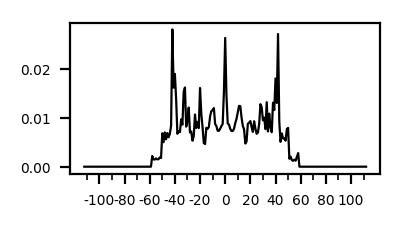

In [20]:
print 'mean SD'
plot_sig(mean_psig1, color='k', note='mean_SD')

mean HS


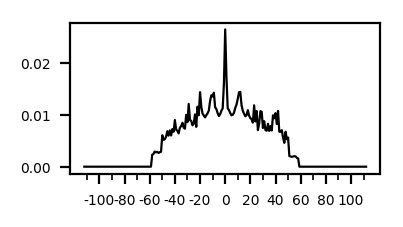

In [21]:
print 'mean HS'
plot_sig(mean_psig2, color='k', note='mean_HS')

mean Chd1


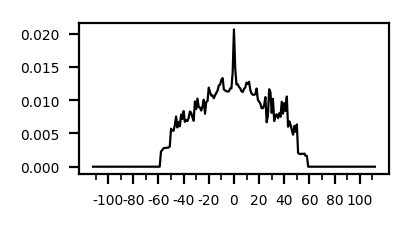

In [22]:
print 'mean Chd1'
plot_sig(mean_psig3, color='k', note='mean_Chd1')